https://www.hatarilabs.com/ih-en/sentinel2-images-explotarion-and-processing-with-python-and-rasterio

In [2]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

#todo use pictures which make more sense

In [3]:
pic1 = rasterio.open("../data/rgb1.tif")
pic2 = rasterio.open("../data/rgb2.tif")
pic3 = rasterio.open("../data/rgb3.tif")
pic4 = rasterio.open("../data/rgb4.tif")

In [4]:
pics = [pic1, pic2, pic3, pic4]

In [5]:
#number of raster bands
pic1.count

3

In [6]:
#number of raster columns
pic1.width

400

In [7]:
#number of raster rows
pic1.height

400

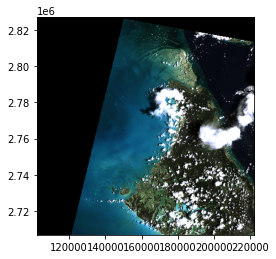

<AxesSubplot:>

In [8]:
#plot band 
plot.show(pic1)

In [9]:
#type of raster byte
pic1.dtypes[0]

'uint8'

In [10]:
#raster sytem of reference
pic1.crs

CRS.from_epsg(32618)

In [11]:
#raster transform parameters
pic1.transform

Affine(300.0379266750948, 0.0, 101985.0,
       0.0, -300.041782729805, 2826915.0)

In [12]:
#raster values as matrix array
pic1.read(1)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 76, 82, 81],
       [ 0,  0,  0, ..., 65, 65, 55],
       [ 0,  0,  0, ..., 52, 55, 58]], dtype=uint8)

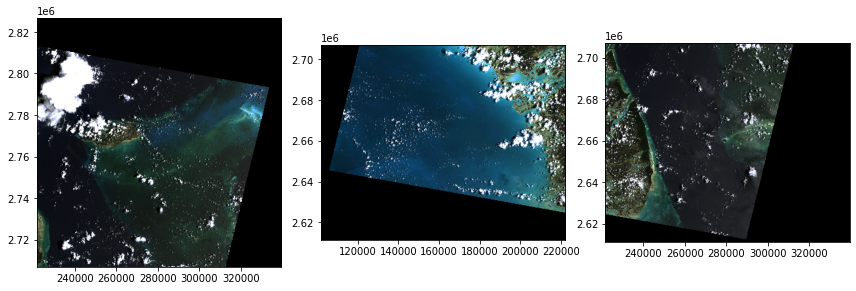

In [13]:
#multiple band representation
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(pic2, ax=ax1, cmap='Blues')
plot.show(pic3, ax=ax2, cmap='Greens')
plot.show(pic4, ax=ax3, cmap='Reds')
fig.tight_layout()

In [14]:
#export true color image
trueColor = rasterio.open('../output/SentinelTrueColor2.tiff','w',driver='Gtiff',
                         width=pic4.width, height=pic4.height,
                         count=3,
                         crs=pic4.crs,
                         transform=pic4.transform,
                         dtype=pic4.dtypes[0]
                         )
trueColor.write(pic2.read(1),3) #blue
trueColor.write(pic3.read(1),2) #green
trueColor.write(pic4.read(1),1) #red
trueColor.close()

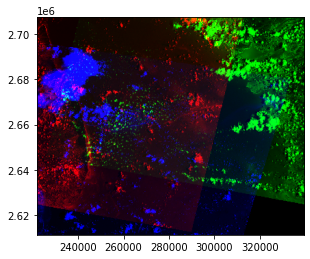

<AxesSubplot:>

In [15]:
src = rasterio.open(r"../output/SentinelTrueColor2.tiff", count=3)
plot.show(src)

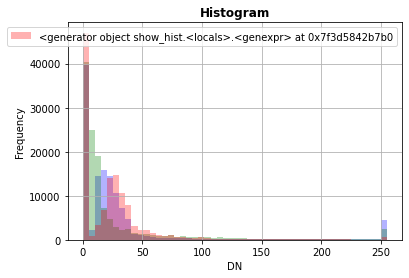

In [16]:
#generate histogram
trueColor = rasterio.open('../output/SentinelTrueColor2.tiff')
plot.show_hist(trueColor, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")